In [90]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('../data/cars93.csv')
df.head(2)


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,NaN,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,NaN,Acura Legend


In [91]:
# categories
cols_with_nan = []
for col in df.columns:
    print("{} {} values {} NaN ".format(col, len(df[col].unique()) , df[df[col].isnull()].shape[0] ))
    if df[df[col].isnull()].shape[0] > 0:
        cols_with_nan.append(col)
        
cols_with_nan        

Manufacturer 32 values 0 NaN 
Model 93 values 0 NaN 
Type 6 values 0 NaN 
Min.Price 79 values 0 NaN 
Price 81 values 0 NaN 
Max.Price 79 values 0 NaN 
MPG.city 21 values 0 NaN 
MPG.highway 22 values 0 NaN 
AirBags 3 values 0 NaN 
DriveTrain 3 values 0 NaN 
Cylinders 6 values 0 NaN 
EngineSize 26 values 0 NaN 
Horsepower 57 values 0 NaN 
RPM 24 values 0 NaN 
Rev.per.mile 78 values 0 NaN 
Man.trans.avail 2 values 0 NaN 
Fuel.tank.capacity 38 values 0 NaN 
Passengers 6 values 0 NaN 
Length 51 values 0 NaN 
Wheelbase 27 values 0 NaN 
Width 16 values 0 NaN 
Turn.circle 14 values 0 NaN 
Rear.seat.room 25 values 2 NaN 
Luggage.room 17 values 11 NaN 
Weight 81 values 0 NaN 
Origin 3 values 4 NaN 
Make 93 values 0 NaN 


['Rear.seat.room', 'Luggage.room', 'Origin']

In [92]:
# rm columns qui ont des NaN
df.drop(columns=cols_with_nan, inplace = True)
df.shape

(93, 24)

In [93]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if (df[col].dtype == 'O') :
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


In [94]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Weight,Make
0,0,48,3,12.9,15.9,18.8,25,31,2,1,...,2890,1,13.2,5,177,102,68,37,2705,0
1,0,55,2,29.2,33.9,38.7,18,25,0,1,...,2335,1,18.0,5,195,115,71,38,3560,1
2,1,8,0,25.9,29.1,32.3,20,26,1,1,...,2280,1,16.9,5,180,102,67,37,3375,3
3,1,0,2,30.8,37.7,44.6,19,26,0,1,...,2535,1,21.1,6,193,106,70,37,3405,2
4,2,5,2,23.7,30.0,36.2,22,30,1,2,...,2545,1,21.1,4,186,109,69,39,3640,4


In [95]:
X = df.drop(columns = ['MPG.city','MPG.highway'] )
X.head()
X.shape
X.describe()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,AirBags,DriveTrain,Cylinders,EngineSize,...,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Weight,Make
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,14.924731,46.000000,2.354839,17.125806,19.509677,21.898925,1.193548,1.064516,1.924731,2.667742,...,2332.204301,0.655914,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,3072.903226,46.000000
std,8.985782,26.990739,1.550913,8.746029,9.659430,11.030457,0.711063,0.527637,1.181714,1.037363,...,496.506525,0.477644,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,589.896510,26.990739
min,0.000000,0.000000,0.000000,6.700000,7.400000,7.900000,0.000000,0.000000,0.000000,1.000000,...,1320.000000,0.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,1695.000000,0.000000
25%,8.000000,23.000000,1.000000,10.800000,12.200000,14.700000,1.000000,1.000000,1.000000,1.800000,...,1985.000000,0.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,2620.000000,23.000000
50%,13.000000,46.000000,2.000000,14.700000,17.700000,19.600000,1.000000,1.000000,1.000000,2.400000,...,2340.000000,1.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,3040.000000,46.000000
75%,22.000000,69.000000,3.000000,20.300000,23.300000,25.300000,2.000000,1.000000,3.000000,3.300000,...,2565.000000,1.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,3525.000000,69.000000
max,31.000000,92.000000,5.000000,45.400000,61.900000,80.000000,2.000000,2.000000,5.000000,5.700000,...,3755.000000,1.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,4105.000000,92.000000


In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [97]:
X

array([[-1.6699298 ,  0.07450112,  0.41824289, ..., -0.61043588,
        -0.62705456, -1.71352567],
       [-1.6699298 ,  0.33525502, -0.23003359, ..., -0.29850985,
         0.83020814, -1.67627511],
       [-1.55803969, -1.4155212 , -1.52658654, ..., -0.61043588,
         0.51489399, -1.60177399],
       ..., 
       [ 1.68677347, -0.67051004,  1.06651937, ..., -0.9223619 ,
        -0.44809247,  1.52727288],
       [ 1.79866358, -1.63902455, -1.52658654, ..., -0.61043588,
        -0.14982233,  1.67627511],
       [ 1.79866358, -1.45277176, -0.23003359, ..., -0.29850985,
         0.29332188,  1.71352567]])

In [98]:
y = df['MPG.highway'].values

In [114]:
# model
from sklearn.linear_model import SGDRegressor

mdl = SGDRegressor(alpha=0.01)
mdl.fit(X,y)
yhat = mdl.predict(X)
print(mean_squared_error(yhat, y))



64.466311388


In [116]:
import numpy as np
np.mean(y)


29.086021505376344

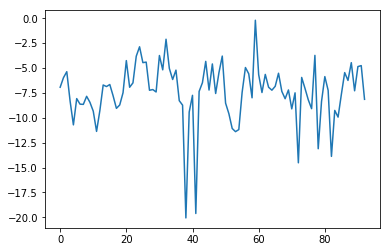

In [117]:
plt.plot(yhat - y)

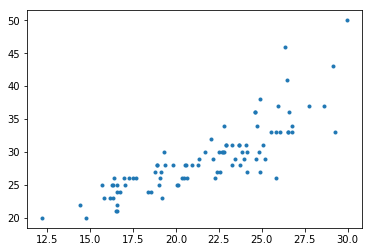

In [120]:
plt.plot(yhat, y, '.')

In [112]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yhat, y))

66.1409747664
